### Candidato 

**Breno da Silva Nogueira**

**Sistemas de Informação**

In [63]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/hype-usp/PS-2023_1/main/Case/Avancado/data/train.csv")

# # Baixar o dataset para uso offline (caso precise)
# with open("titanic.pkl", "wb") as f:
#     pickle.dump(df, f)

# Baixar o dataset para uso offline (caso precise)
# with open("titanic.pkl", "rb") as f:
#     df = pickle.load(f)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Há um número imenso de valores faltantes na coluna de cabine, grandes demais para serem substituidos, além de ser um coluna com 
pouco significado para o case, então será descartada (ele poderia ter mais relevância se viesse junto com alguma outra 
coluna dando alguma referência quanto a localização da cabine no navio)

- Há uma quantidade considerável de idades faltando, mas podemos preencher usando medianas levando em conta outros atributos

In [65]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Dropar a coluna de cabin, que possui muitos NAs e não tem tanta significância
- Dropar a coluna de Id e de nome já que não tem tanto uso para nós
- Dropar a coluna de nome, já que não entra como atributo categórico 
- Dropar a coluna de ticket, já que não tem muito o que tirar dele

In [66]:
df.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], inplace=True)

- Não há numeros errados no campo de survived (0,1)
- Não aparentam ter idades fora de um range crível
- "Fare" aparenta ter alguns outliers que valem a pena dar uma checada, uma vez que tem um pulo 
muito grande do terceiro quartil para o valor máximo 

In [67]:
df.describe()




,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como previsto, mesmo estando em classe alta, há um outlier que gostariamos de apagar


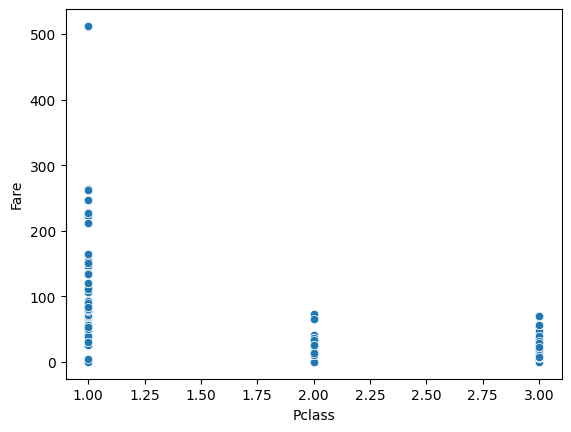

In [68]:
sns.scatterplot(df, x="Pclass", y="Fare");


Esses dois registros de 512 Dólares podem ser problema, para não ter que tirar o registro inteiro, 
vamos substituir pela média dos tickets mais caros abaixo dos 512 

In [69]:
mean = df.loc[(df['Fare'] > 200) & (df['Fare'] < 300), "Fare"].median()
df.loc[(df['Fare'] > 500), "Fare"] = mean

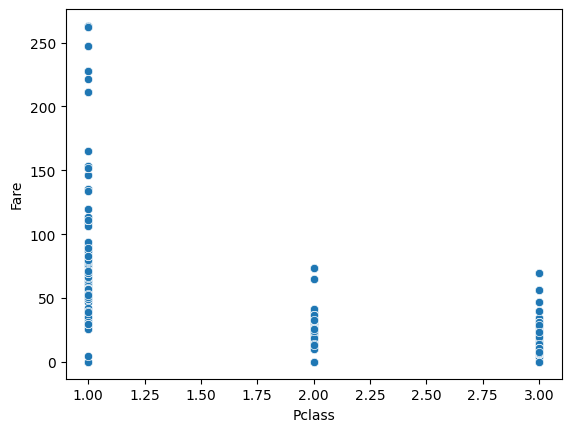

In [70]:
# Melhor!
sns.scatterplot(df, x="Pclass", y="Fare");

Só pra morrer de certeza que não tem valores fora de (0,1)

In [71]:
df.loc[(df['Survived'] < 1) & (df['Survived'] > 0)] # Nada, tudo ok

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [72]:
df['Sex'].value_counts() # Ok, sem erros

Sex
male      577
female    314
Name: count, dtype: int64

In [73]:
df['Embarked'].value_counts() # Maravilha, há uma ausência de incorretudes

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Caso você tivesse filhos ou estivesse com seus pais, as chances de sobreviver são ainda menores de caso você estivesse sozinho (plot à direita), coincidentemente, você também teria menos chances de sobreviver caso estivesse com um irmão ou cônjuge (plot à esquerda).

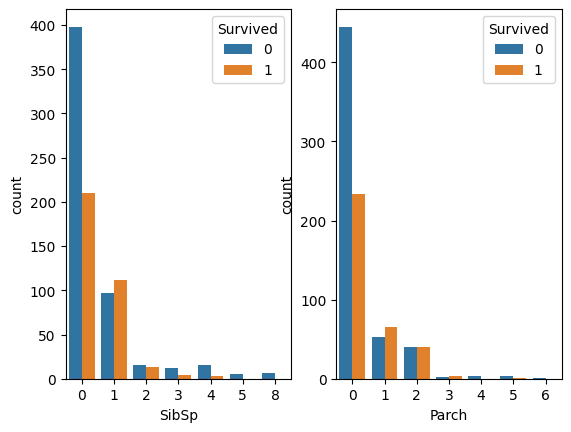

In [74]:

fig, axis = plt.subplots(ncols=2)
sns.countplot(df, x="SibSp", hue="Survived", ax=axis[0]);
sns.countplot(df, x="Parch", hue="Survived", ax=axis[1]);


Temos uma maior quantidade de pessoas que morreram do que sobreviveram (500+ para ~330) 


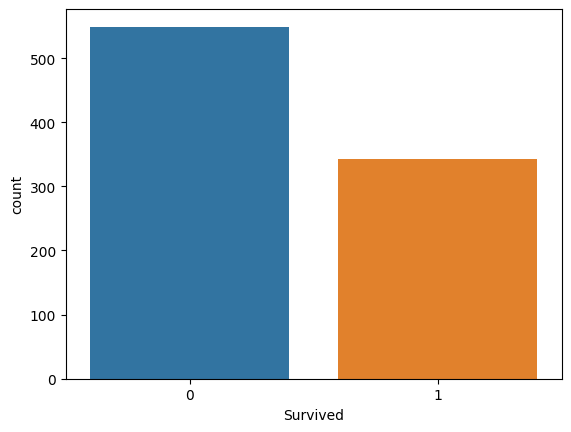

In [75]:
sns.countplot(df, x="Survived");

Das classes, a que mais sobreviveram foram os de Classe A e os de Classe C

Contudo, por serem em maior número (e possivelmente com menor prioridade), a Classe C foi a que teve maior número de mortes

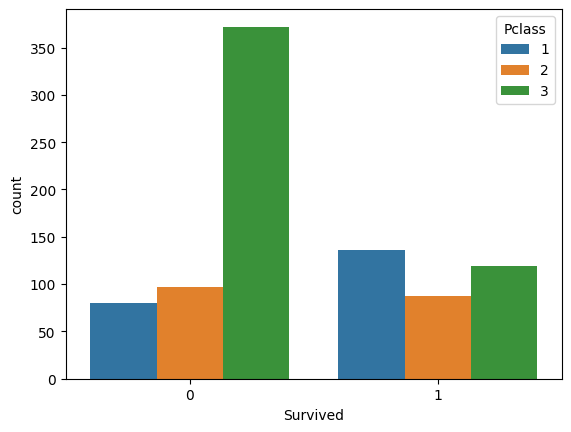

In [76]:
sns.countplot(df, x="Survived", hue="Pclass");

Mulheres foram as que mais sobreviveram, em comparação, os Homens tiveram mais mortes. 
(Espero que nenhum deles sejam por falta de espaço numa porta-salva-vidas)

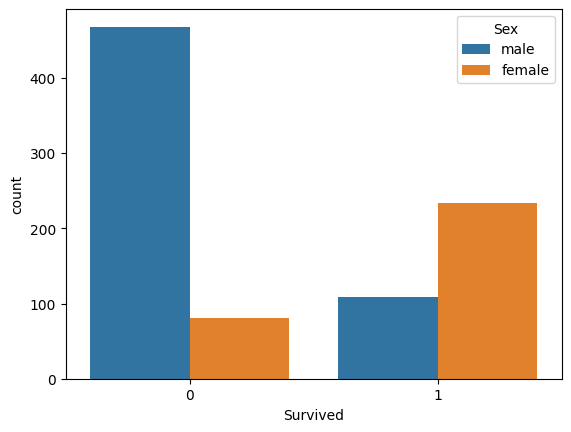

In [77]:
sns.countplot(df, x="Survived", hue="Sex");

Esses serão os atributos que vamos usar no treinamento do modelo

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Tratamento dos dados para serem inputados no modelo

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separação dos atributos preditores e do alvo de predição
X = df[[x for x in df.columns.tolist() if x != "Survived"]]
y = df['Survived'].copy()

# Colunas numéricas
numerics = ['Age', 'Fare', "Parch", "SibSp"]

# Colunas de Categóricas
categories = [att for att in X.columns.tolist() if att not in numerics]

# Pipeline de tratamento dos dados numéricos
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("normalize", StandardScaler())
])
df_num = X[numerics]
num_pipeline.fit_transform(df_num)

# Pipeline de tratamento de dados categoricos e agregação de colunas
full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerics),
    ("one_hot", OneHotEncoder(sparse_output=False), categories),
])

X_treated = full_pipeline.fit_transform(X)


In [80]:
from sklearn.model_selection import train_test_split

# Split de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, random_state=42)

Vamos testar primeiramente o modelo de K-Nearest Neighbors para ver como ele se comporta com nossos dados

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

O resultado do cross validation foi razoável, mas vamos dar uma olhada a mais no modelo

In [82]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn, X_train, y_train, cv=10).mean()

0.7844866576209859

As métricas de precisão e de revocação não estão tão bonitas assim, o que quer dizer que nosso modelo não é tão bom assim em classificar as instâncias positivas do nosso dataset (exatamente o nosso objetivo). 

In [83]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, predictions), recall_score(y_test, predictions)

(0.7325581395348837, 0.7078651685393258)

Como esperado, o número de pessoas que foram preditas como não-sobreviventes foi maior do que as que conseguiriam escapar com vida. Mas a quantidade de falsos negativos é um pouco maior em relação à razão de falso positivos (uma vez que tem mais casos falsos do que positivos no nosso case). 

Nos próximos modelos podemos tentar diminuir esses falsos positivos para um modelo com mais "força" em predizer positivos, ou diminuir ainda mais os falsos negativos para ficar ainda melhor em predizer negativos.  

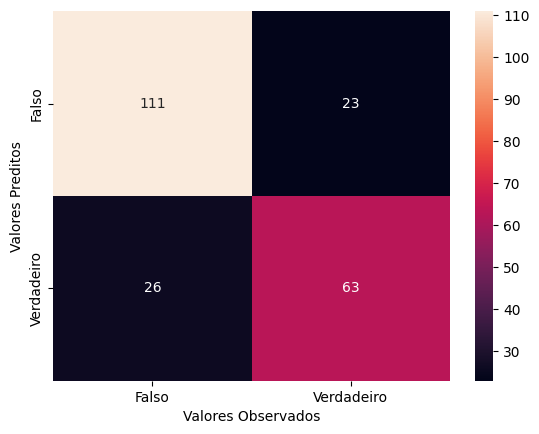

In [84]:
from sklearn.metrics import confusion_matrix

labels = ["Falso", "Verdadeiro"]
cm = sns.heatmap(confusion_matrix(y_test, predictions), xticklabels=labels, yticklabels=labels, annot=True, fmt='g')
cm.set(xlabel="Valores Observados", ylabel="Valores Preditos");

Primeiro vamos tentar achar os hiperparâmetros "perfeitos" para o KNN antes de tentar outros modelos. 

Vamos testar uma combinação de k's de 3 até 50 e entre o hiperparametro de "weight", usando um GridSearch para as iterações

In [85]:

from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": list(range(3, 51)),
    "weights": ['uniform', 'distance']
}
grid = GridSearchCV(KNeighborsClassifier(), params)
grid.fit(X_train, y_train)
cross_val_score(grid.best_estimator_, X_test, y_test, cv=10).mean()

0.7444664031620555

Não achamos um modelo melhor do que o anterior, então podemos procurar em outros tipos de modelos usando o mesmo método, contudo, usando os hiperparâmetros específicos de cada modelo.

[Fonte dos Modelos](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)

In [86]:
from sklearn.linear_model import LogisticRegression

params = { 
    'C': [.1, .25, .50, .75, 1],
    'max_iter' : [100, 500, 1000]
}
loggrid = GridSearchCV(LogisticRegression(random_state=42), params)
loggrid.fit(X_train, y_train)
cross_val_score(loggrid.best_estimator_, X_test, y_test, cv=10).mean()



0.7879446640316206

In [87]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()
params = {
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [100, 300, 500, 1000],
}

forestgrid = GridSearchCV(RandomForestClassifier(random_state=42), params)
forestgrid.fit(X_train, y_train)
cross_val_score(forestgrid.best_estimator_, X_test, y_test, cv=10).mean()


0.7976284584980238

In [88]:
from sklearn.svm import SVC

params = { 
    'C': [.1, .25, .50, .75, 1],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto']
}
svcgrid = GridSearchCV(SVC(random_state=42), params)
svcgrid.fit(X_train, y_train)
cross_val_score(svcgrid.best_estimator_, X_test, y_test, cv=10).mean()

0.8116600790513836

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
params = { 
    'var_smoothing': np.logspace(0,-9, num=100)
}

bayesgrid = GridSearchCV(GaussianNB(), params)
bayesgrid.fit(X_train, y_train)
cross_val_score(bayesgrid.best_estimator_, X_test, y_test, cv=10).mean()

0.7796442687747035

Depois de todos os modelos testados, vamos analisar o que teve o melhor desempenho:

Como dito na matriz de confusão do nosso primeiro modelo, ele estava se saindo muito melhor em predizer quem não sobreviveria do que quem sobreviveria, e esse modelo é ainda melhor nessa tarefa, tendo um rate de falsos negativos ainda melhor, em contrapartida, ele é ainda pior para predizer quem sairia com vida do Titanic (podemos chamar ele de "Oráculo da Morte 2000", já que adora dizer quem não vai sobreviver)

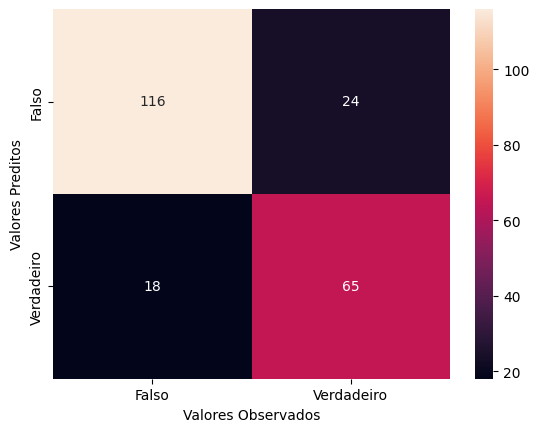

In [90]:
best = svcgrid.best_estimator_

labels = ["Falso", "Verdadeiro"]
cm = sns.heatmap(confusion_matrix(best.predict(X_test), y_test), xticklabels=labels, yticklabels=labels, annot=True, fmt='g')
cm.set(xlabel="Valores Observados", ylabel="Valores Preditos");

Ainda sim, podemos ver que ele tem as métricas de precisão e de revocação maiores que o modelo original! Podemos ficar com esse por enquanto, ele mereceu. 

In [91]:
from sklearn.metrics import precision_score, recall_score

predictions = best.predict(X_test)
precision_score(y_test, predictions), recall_score(y_test, predictions)

(0.7831325301204819, 0.7303370786516854)